In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [183]:
df= pd.read_csv("D:\Pritesh\ML\web scrapping\TV.csv")
df.head()

,Unnamed: 0,Brand,Model Name,Display Size,Operating System,Picture Quality,Smart Tv,Sound Technology,Refresh Rate,Screen Type,Connectivity,Price
0,0,Mi,L40M8-5AIN,100 cm (40 inch),Google TV,"Full HD, 1920 x 1080",Yes,NaN,60 Hz,LED,2 HDMI | 2 USB,"₹20,999"
1,1,SONY,KD - 43X74K,108 cm (43 inch),Google TV,"Ultra HD (4K), 3840 x 2160",Yes,"Clear Phase, S-Master Digital Amplifier, Dolby...",60 Hz,LED,3 HDMI | 2 USB,"₹37,990"
2,2,SONY,KD-55X74K,138.8 cm (55 inch),Google TV,"Ultra HD (4K), 3840 x 2160",Yes,NaN,60 Hz,LED,3 HDMI | 2 USB,"₹52,490"
3,3,SAMSUNG,UA55CUE70AKLXL,138 cm (55 inch),Tizen,"Ultra HD (4K), 3840 x 2160",Yes,NaN,50 Hz,LED,3 (Rear) HDMI | 1 (Rear) USB,"₹42,990"
4,4,MOTOROLA,32HDGDMBSXP,80 cm (32 inch),Google TV,"HD Ready, 1366 x 768",Yes,NaN,60 Hz,LED,3 HDMI | 2 USB,"₹10,999"


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        975 non-null    int64 
 1   Brand             975 non-null    object
 2   Model Name        975 non-null    object
 3   Display Size      975 non-null    object
 4   Operating System  815 non-null    object
 5   Picture Quality   952 non-null    object
 6   Smart Tv          952 non-null    object
 7   Sound Technology  348 non-null    object
 8   Refresh Rate      947 non-null    object
 9   Screen Type       952 non-null    object
 10  Connectivity      975 non-null    object
 11  Price             975 non-null    object
dtypes: int64(1), object(11)
memory usage: 91.5+ KB


In [185]:
df.drop(columns="Sound Technology",inplace=True)

In [186]:
df.drop(columns='Unnamed: 0',inplace= True)

In [187]:
df.drop(columns='Model Name',inplace= True)

In [188]:
df.duplicated().sum()

444

In [8]:
#df.drop_duplicates(inplace=True)

In [189]:
df.Price = df.Price.str.replace("₹","")
df.Price = df.Price.str.replace(",","")
df['Price'] = df['Price'].astype(int)

In [190]:
df['Brand'].unique()

array(['Mi', 'SONY', 'SAMSUNG', 'MOTOROLA', 'Hisense', 'Vu', 'iFFALCON',
       'Acer', 'realme', 'LG', 'OnePlus', 'Thomson', 'KODAK', 'MarQ',
       'TOSHIBA', 'Dyanora', 'XElectron', 'Blaupunkt', 'TCL', 'SENS',
       'Sansui', 'Coocaa', 'Compaq', 'InnoQ', 'Infinix', 'Xiaomi',
       'ONIDA', 'BeethoSOL', 'Foxsky', 'NU', 'CANDY', 'SKYTRON', 'Lloyd',
       'Panasonic', 'Reliance', 'BPL', 'Haier', 'ZEBRONICS', 'T-Series',
       'RGL', 'REDMI', 'JVC', 'Aiwa', 'Candes', 'DETEL', 'iMEE', 'CORNEA',
       'LIMEBERRY', 'INVANTER', 'Hyundai', 'Cellecor', 'smart',
       'STARSHINE', 'Salora', 'Panwood', 'VG', 'AGE', 'IMPEX', 'TRUSENSE',
       'Feltron', 'V-SKY', 'Gangnam', 'Samtonic', 'itel', 'EGOTEL',
       'OPPO', 'Apple', 'vivo', 'Power'], dtype=object)

In [192]:
df['Brand'] = df['Brand'].str.replace("Mi","Xiaomi")
df['Brand'] = df['Brand'].str.replace("REDMI","Xiaomi")

In [193]:
df['Brand'].value_counts()

Brand
Thomson      170
SAMSUNG       95
LG            87
KODAK         70
XElectron     65
            ... 
Salora         1
STARSHINE      1
ZEBRONICS      1
NU             1
Power          1
Name: count, Length: 67, dtype: int64

In [194]:
brand = df['Brand'].value_counts()
other_brand = brand[brand<10].index.to_list()
print(other_brand)

['iMEE', 'SENS', 'LIMEBERRY', 'vivo', 'smart', 'iFFALCON', 'CORNEA', 'InnoQ', 'T-Series', 'Apple', 'BeethoSOL', 'INVANTER', 'Coocaa', 'JVC', 'CANDY', 'BPL', 'Infinix', 'Candes', 'VG', 'realme', 'Cellecor', 'Hyundai', 'SKYTRON', 'Compaq', 'OnePlus', 'ONIDA', 'Foxsky', 'DETEL', 'Aiwa', 'RGL', 'Panwood', 'AGE', 'TRUSENSE', 'Samtonic', 'OPPO', 'EGOTEL', 'Gangnam', 'itel', 'Reliance', 'V-SKY', 'Feltron', 'IMPEX', 'Salora', 'STARSHINE', 'ZEBRONICS', 'NU', 'Power']


In [195]:
df['Brand'] = df['Brand'].apply([lambda x: "Others" if x in other_brand else x])

In [196]:
df['Display Size'].value_counts()

Display Size
80 cm (32 inch)       134
108 cm (43 inch)      124
139 cm (55 inch)      116
164 cm (65 inch)       92
126 cm (50 inch)       80
                     ... 
164 cm (65 Inch)        1
138 mm (55 inch)        1
98 cm (40 inch)         1
101 cm (40 inch)        1
81.01 cm (32 inch)      1
Name: count, Length: 64, dtype: int64

In [197]:
df['Display Size'] = df['Display Size'].apply(lambda x:"".join(x.split(" ")[0]))

In [198]:
df['Operating System'].value_counts()

Operating System
Google TV        368
Android          177
WebOS             98
Tizen             82
Android Based     24
Linux             23
Android 13        10
VIDAA              9
Linux based        7
Android 12         5
iOS 16             4
iOS 17             3
Coolita            2
HomeOS             1
FireTv OS 7        1
Android 14         1
Name: count, dtype: int64

In [199]:
def os(data):
    if 'Android' in str(data):
        return "Android"
    elif 'iOS' in str(data):
        return "iOS"
    elif 'Linux' in str(data):
        return "Linux"
    else:
        return data

df['Operating System'] = df['Operating System'].apply(os)

In [200]:
o_s = df['Operating System'].value_counts()
other_brand = o_s[o_s<10].index.to_list()
print(other_brand)
df['Operating System'] = df['Operating System'].apply([lambda x: "Others" if x in other_brand else x])

['VIDAA', 'iOS', 'Coolita', 'HomeOS', 'FireTv OS 7']


In [201]:
df['Picture Quality'].value_counts()

Picture Quality
Ultra HD (4K), 3840 x 2160      557
HD Ready, 1366 x 768            210
Full HD, 1920 x 1080             72
Ultra HD (4K), 3840 × 2160       52
Ultra HD (4K), 3840*2160          7
HD Ready, 1366x768                5
HD Ready, 1920 x 1080             5
Ultra HD (4K), 3840x2160          4
Ultra HD (4K), 3840 X 2160        4
Ultra HD (4K), 3,840 x 2,160      4
Ultra HD (8K), 7680 x 4320        3
Full HD, 1080 x 1920              3
HD Ready, 1,366 x 768             2
Ultra HD (4K), 3840 x 2161        2
Full HD, 1366 x 768               2
HD Ready, 1366*768                2
Full HD, 1920 X 1080              1
Full HD, 1280 x 720               1
Full HD, 1920X1080                1
HD Ready, 720 P                   1
HD Ready, 1366X768                1
Ultra HD (4K), 3840 * 2160        1
Ultra HD (4K), 4K                 1
HD Ready, 1280x720$$Pixels        1
Full HD, 1920x1081                1
Ultra HD (4K), 2160 x 3840        1
Full HD, 1920 X 108               1
Ultra HD (4K

In [202]:
df['Picture Quality'] = df['Picture Quality'].str.replace("*","x")
new = df['Picture Quality'].str.split('x',n=1,expand=True)
print(new)

                        0      1
0          Full HD, 1920    1080
1    Ultra HD (4K), 3840    2160
2    Ultra HD (4K), 3840    2160
3    Ultra HD (4K), 3840    2160
4         HD Ready, 1366     768
..                    ...    ...
970   Ultra HD (4K), 3840   2160
971  Ultra HD (4K), 3840    2160
972       HD Ready, 1366     768
973       HD Ready, 1366     768
974       HD Ready, 1366     768

[975 rows x 2 columns]


In [203]:
df['X_res'] = new[0]
df['Y_res'] = new[1]
df.sample(5)

,Brand,Display Size,Operating System,Picture Quality,Smart Tv,Refresh Rate,Screen Type,Connectivity,Price,X_res,Y_res
198,Thomson,108,Google TV,"Ultra HD (4K), 3840 × 2160",Yes,60 Hz,QLED,3 (Rear) HDMI | 2 (Rear) USB,20999,"Ultra HD (4K), 3840 × 2160",None
558,SAMSUNG,108,Tizen,"Ultra HD (4K), 3840 x 2160",Yes,60 Hz,LED,3 (Rear) HDMI | 1 (Rear) USB,33250,"Ultra HD (4K), 3840",2160
371,SONY,189,Google TV,"Ultra HD (4K), 3840 x 2160",Yes,50 Hz,LED,4 (Rear) HDMI | 2 USB,148490,"Ultra HD (4K), 3840",2160
289,KODAK,126,Google TV,"Ultra HD (4K), 3840 x 2160",Yes,60 Hz,LED,3 HDMI | 2 USB,24699,"Ultra HD (4K), 3840",2160
184,Dyanora,60,NaN,"HD Ready, 1366 x 768",No,60 Hz,LED,1 Rear HDMI | 1 USB,5799,"HD Ready, 1366",768


In [204]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)')

In [205]:
df['X_res'] = df['X_res'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else np.nan)

In [206]:
df['Y_res'] = df['Y_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)')
df['Y_res'] = df['Y_res'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else np.nan)
df['Y_res'] = df['Y_res'].astype('float')
df['X_res'] = df['X_res'].astype('float')
df['Y_res'].fillna(df['Y_res'].mean(),inplace=True)
df['X_res'].fillna(df['X_res'].mean(),inplace=True)

In [207]:
df['Display Size'] = df['Display Size'].astype('float')
df['ppcm'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Display Size']).astype('float')

In [208]:
df.corr(numeric_only=True)

,Display Size,Price,X_res,Y_res,ppcm
Display Size,1.000000,0.590202,0.722106,0.730597,-0.364374
Price,0.590202,1.000000,0.467851,0.474966,-0.041193
X_res,0.722106,0.467851,1.000000,0.963242,0.159711
Y_res,0.730597,0.474966,0.963242,1.000000,0.150733
ppcm,-0.364374,-0.041193,0.159711,0.150733,1.000000


In [209]:
df.drop(columns="ppcm",inplace=True)

In [210]:
df['Smart Tv'] = df['Smart Tv'].fillna(df['Smart Tv'].mode())
df['Smart Tv'] = df['Smart Tv'].str.replace("Yes", "1").str.replace("No", "0").astype("float")


In [211]:
df['Refresh Rate'] = df['Refresh Rate'].str.replace("Hz",'').str.replace("W",'').str.replace("HZ",'').astype('float')
df['Refresh Rate'].fillna(df['Refresh Rate'].mode())

0      60.0
1      60.0
2      60.0
3      50.0
4      60.0
       ... 
970    60.0
971    60.0
972    60.0
973    60.0
974    60.0
Name: Refresh Rate, Length: 975, dtype: float64

In [212]:
df['Screen Type'].value_counts()

Screen Type
LED     608
QLED    303
OLED     38
QNED      2
LCD       1
Name: count, dtype: int64

In [213]:
df = df[~df['Screen Type'].isin(['QNED', 'LCD'])]

In [214]:
df['Screen Type'].value_counts()

Screen Type
LED     608
QLED    303
OLED     38
Name: count, dtype: int64

In [215]:
df['Connectivity'].value_counts()

Connectivity
3 HDMI | 2 USB                                                                                             266
3 Rear HDMI | 2 USB                                                                                        145
3 (Rear) HDMI | 2 (Rear) USB                                                                                93
2 HDMI | 2 USB                                                                                              67
2 Rear HDMI | 2 USB                                                                                         58
4 HDMI | 2 USB                                                                                              58
2 HDMI | 1 USB                                                                                              55
1 Rear HDMI | 2 USB                                                                                         43
3 HDMI | 1 USB                                                                                     

In [216]:
df['Connectivity'].str.replace("Dual","2")
new_conn = df['Connectivity'].str.split("|",n=1,expand=True)
new_conn

,0,1
0,2 HDMI,2 USB
1,3 HDMI,2 USB
2,3 HDMI,2 USB
3,3 (Rear) HDMI,1 (Rear) USB
4,3 HDMI,2 USB
...,...,...
970,3 HDMI,2 USB
971,3 HDMI,2 USB
972,2 (Rear) HDMI,2 (Rear) USB
973,2 HDMI,2 USB


In [217]:
df['HDMI'] = new_conn[0]
df['USB'] = new_conn[1]

In [218]:
df['HDMI'] = df['HDMI'].str.findall(r'(\d)')
df['HDMI'] = df['HDMI'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else "1").astype("int")
df['USB'] = df['USB'].str.findall(r'(\d)')
df['USB'] = df['USB'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else "1").astype("int")

In [219]:
df.drop(columns="Connectivity",inplace=True)
df.drop(columns="Picture Quality",inplace=True)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 972 entries, 0 to 974
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             972 non-null    object 
 1   Display Size      972 non-null    float64
 2   Operating System  812 non-null    object 
 3   Smart Tv          949 non-null    float64
 4   Refresh Rate      944 non-null    float64
 5   Screen Type       949 non-null    object 
 6   Price             972 non-null    int32  
 7   X_res             972 non-null    float64
 8   Y_res             972 non-null    float64
 9   HDMI              972 non-null    int32  
 10  USB               972 non-null    int32  
dtypes: float64(5), int32(3), object(3)
memory usage: 79.7+ KB


In [221]:
df.duplicated().sum()

447

In [222]:
df.drop_duplicates(inplace=True)

In [223]:
df['Operating System'].fillna(df['Operating System'].mode().iloc[0],inplace=True)
df['Smart Tv'].fillna(df['Smart Tv'].mode().iloc[0],inplace=True)
df['Refresh Rate'].fillna(df['Refresh Rate'].mode().iloc[0],inplace=True)
df['Screen Type'].fillna(df['Screen Type'].mode().iloc[0],inplace=True)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 971
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             525 non-null    object 
 1   Display Size      525 non-null    float64
 2   Operating System  525 non-null    object 
 3   Smart Tv          525 non-null    float64
 4   Refresh Rate      525 non-null    float64
 5   Screen Type       525 non-null    object 
 6   Price             525 non-null    int32  
 7   X_res             525 non-null    float64
 8   Y_res             525 non-null    float64
 9   HDMI              525 non-null    int32  
 10  USB               525 non-null    int32  
dtypes: float64(5), int32(3), object(3)
memory usage: 43.1+ KB


In [159]:
df.dropna(inplace=True)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 971
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             525 non-null    object 
 1   Display Size      525 non-null    float64
 2   Operating System  525 non-null    object 
 3   Smart Tv          525 non-null    float64
 4   Refresh Rate      525 non-null    float64
 5   Screen Type       525 non-null    object 
 6   Price             525 non-null    int32  
 7   X_res             525 non-null    float64
 8   Y_res             525 non-null    float64
 9   HDMI              525 non-null    int32  
 10  USB               525 non-null    int32  
dtypes: float64(5), int32(3), object(3)
memory usage: 43.1+ KB


<Axes: >

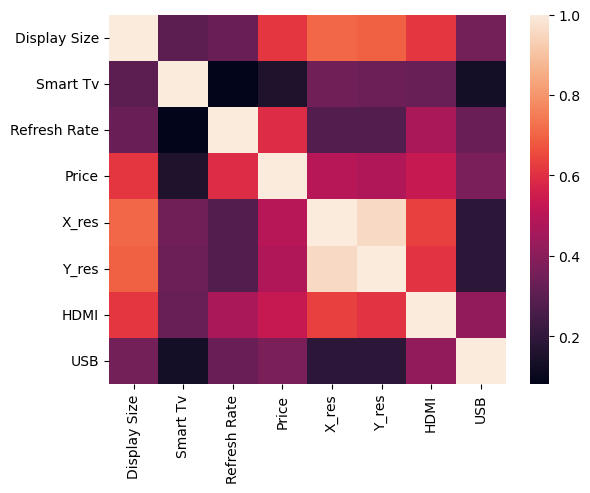

In [226]:
sns.heatmap(df.corr(numeric_only=True))

<Axes: xlabel='Price', ylabel='Density'>

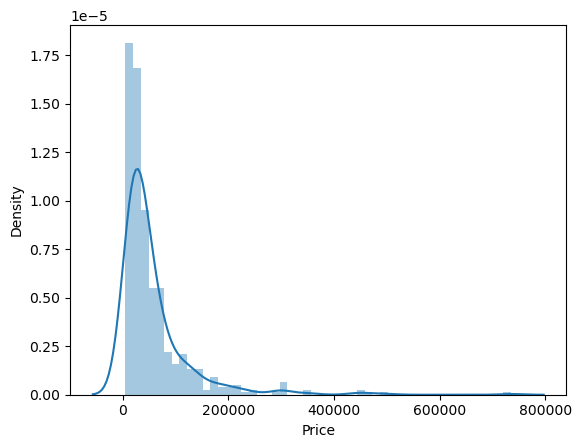

In [227]:
sns.distplot(df.Price)

<Axes: xlabel='Operating System'>

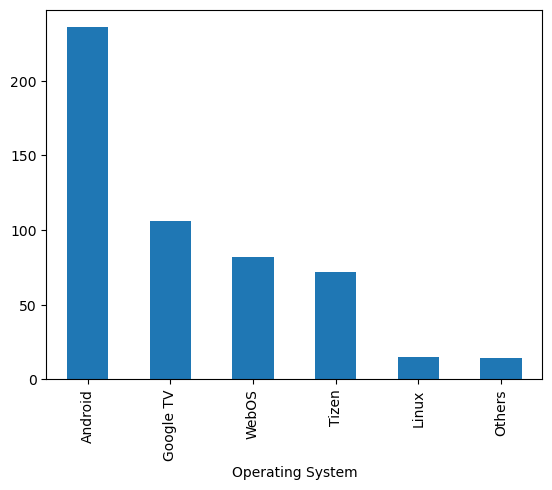

In [228]:
df['Operating System'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Brand'>

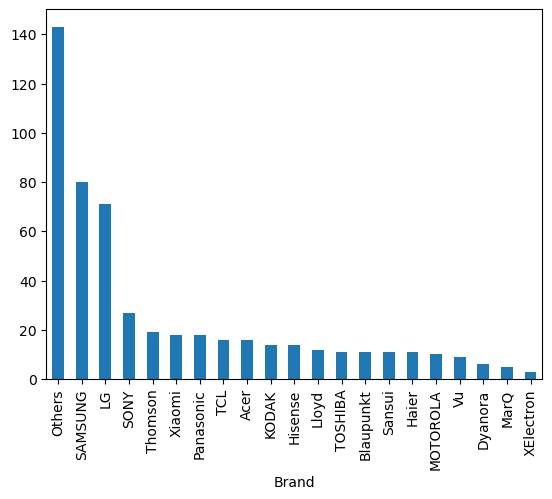

In [229]:
df['Brand'].value_counts().plot(kind = 'bar')

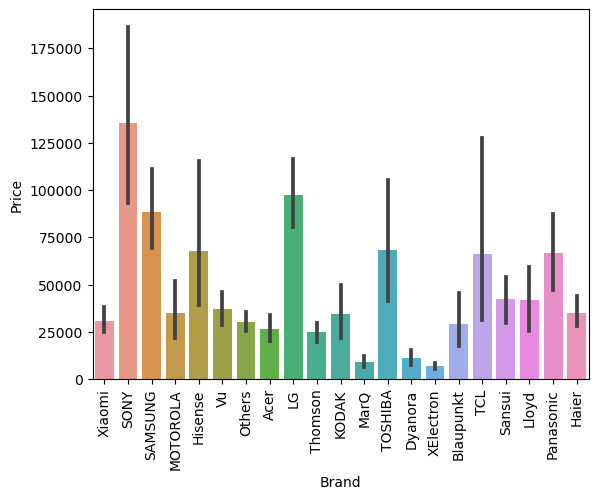

In [230]:
sns.barplot(x=df.Brand,y=df.Price)
plt.xticks(rotation = 'vertical')
plt.show()

In [231]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

<Axes: xlabel='Price', ylabel='Density'>

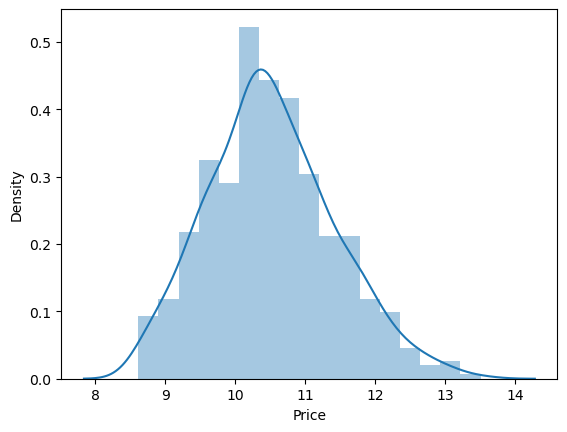

In [232]:
X= df.drop(columns="Price")
Y = np.log(df['Price'])
sns.distplot(Y)

In [233]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [234]:
X_train

,Brand,Display Size,Operating System,Smart Tv,Refresh Rate,Screen Type,X_res,Y_res,HDMI,USB
809,Others,109.0,WebOS,1.0,60.0,LED,3080.32,1718.930101,3,2
40,Thomson,126.0,Google TV,1.0,60.0,QLED,3840.00,2160.000000,3,2
951,TCL,215.0,Google TV,1.0,60.0,LED,3840.00,1718.930101,3,2
864,Panasonic,100.0,Android,1.0,60.0,LED,1920.00,1080.000000,2,2
573,LG,139.0,WebOS,1.0,50.0,LED,3840.00,2160.000000,4,3
...,...,...,...,...,...,...,...,...,...,...
38,TCL,126.0,Google TV,1.0,60.0,QLED,3840.00,2160.000000,3,1
24,Thomson,108.0,Google TV,1.0,60.0,QLED,3840.00,1718.930101,3,2
41,Blaupunkt,189.0,Google TV,1.0,60.0,QLED,3840.00,2160.000000,3,2
73,Others,108.0,Android,1.0,60.0,LED,1920.00,1080.000000,3,2


In [236]:
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),[0,2,5])
],remainder='passthrough')
step_2  = LinearRegression()
pipe = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8818102874901573
MAE 0.19525721367494364


In [237]:
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first',handle_unknown="ignore"),[0,2,5])
],remainder='passthrough')
step_2  = RandomForestRegressor()
pipe_rf = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe_rf.fit(X_train,Y_train)
y_pred = pipe_rf.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))


R2 score 0.9249839843829984
MAE 0.18409878475638297


In [243]:
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),[0,2,5])
],remainder='passthrough')
step_2  = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.9270596426215709
MAE 0.20972577882765275


In [244]:
from sklearn.tree import DecisionTreeRegressor
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),[0,2,5])
],remainder='passthrough')
step_2  = DecisionTreeRegressor()
pipe = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8895194416427266
MAE 0.22832027910230906


In [238]:
def best_rs(X,Y):
    r2_score_ =[]
    try:
        for i in range(1,100):
            X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=i)
            pipe_rf.fit(X_train,Y_train)
            y_pred = pipe_rf.predict(X_test)
            r2_score_.append(r2_score(Y_test,y_pred))
        return r2_score_
    except ValueError as e:
        print("error")

In [239]:
import warnings
warnings.simplefilter("ignore") 

In [240]:
result = best_rs(X,Y)
print(np.argmax(result))

70


In [241]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=71)


In [242]:
np.random.seed(42)
from sklearn.model_selection import GridSearchCV
param_dist = {'step2__n_estimators': [50,100,150,200,500],
              'step2__max_depth': [2, 3, 4, 8, 15,None],
              
              'step2__max_samples': [0.5, 0.75, 1.0],
              'step2__max_features': ['sqrt', 'log2', None],
              'step2__criterion': ["squared_error", "absolute_error"]}

cv_rf = GridSearchCV(estimator=pipe_rf, 
                     cv = 5,
                     param_grid=param_dist,
                     n_jobs = -1)

cv_rf.fit(X,Y)

print('Best Parameters using grid search: \n',
      cv_rf.best_params_)

Best Parameters using grid search: 
 {'step2__criterion': 'absolute_error', 'step2__max_depth': None, 'step2__max_features': None, 'step2__max_samples': 1.0, 'step2__n_estimators': 100}


In [245]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=71)
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first',handle_unknown="ignore"),[0,2,5])
],remainder='passthrough')
step_2  = RandomForestRegressor(n_estimators=100,
                               criterion='absolute_error',
                               max_depth=None,
                               max_features=None,
                               max_samples=1.0)
pipe_rf = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe_rf.fit(X_train,Y_train)
y_pred = pipe_rf.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.9481717337525201
MAE 0.16850778705496108


In [246]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(pipe_rf, X_train, Y_train, cv=kf)

print("Cross-Validation Scores:", cross_val_scores)

Cross-Validation Scores: [0.90680931 0.84493391 0.87836057 0.91712493 0.87563116]


In [247]:
import pickle

pickle.dump(df,open('df_TV.pkl','wb'))
pickle.dump(pipe_rf,open('pipe_rf_TV.pkl','wb'))
